# Análisis Exploratorio de Datos - **Proyecto del Titanic**
## ➡️ Uriel Emiliano Mendez

Este proyecto consiste en la predicción de la supervivencia de los pasajeros del Titanic utilizando técnicas de Machine Learning. Utilizando el conjunto de datos disponible en Kaggle, he aplicado diversas estrategias de análisis, limpieza de datos y modelos de clasificación para predecir quién sobrevivió al naufragio. El objetivo es mejorar la precisión de las predicciones y optimizar los modelos a través de enfoques como GridSearchCV, validación cruzada y selección de características.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

sns.set()

In [2]:
df_main = pd.read_csv('../datasets\Titanic-Dataset.csv')
df_ext = pd.read_csv('../datasets\Titanic-Dataset-Extendido.csv')

In [3]:
print(df_main.shape, df_ext.shape)

(891, 12) (891, 21)


### Pruebas empiricas.

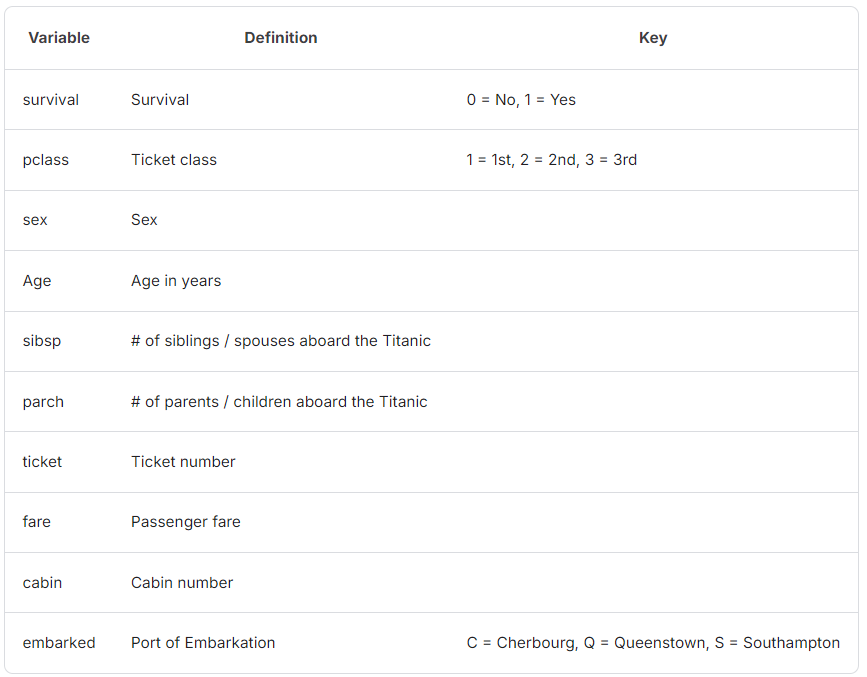

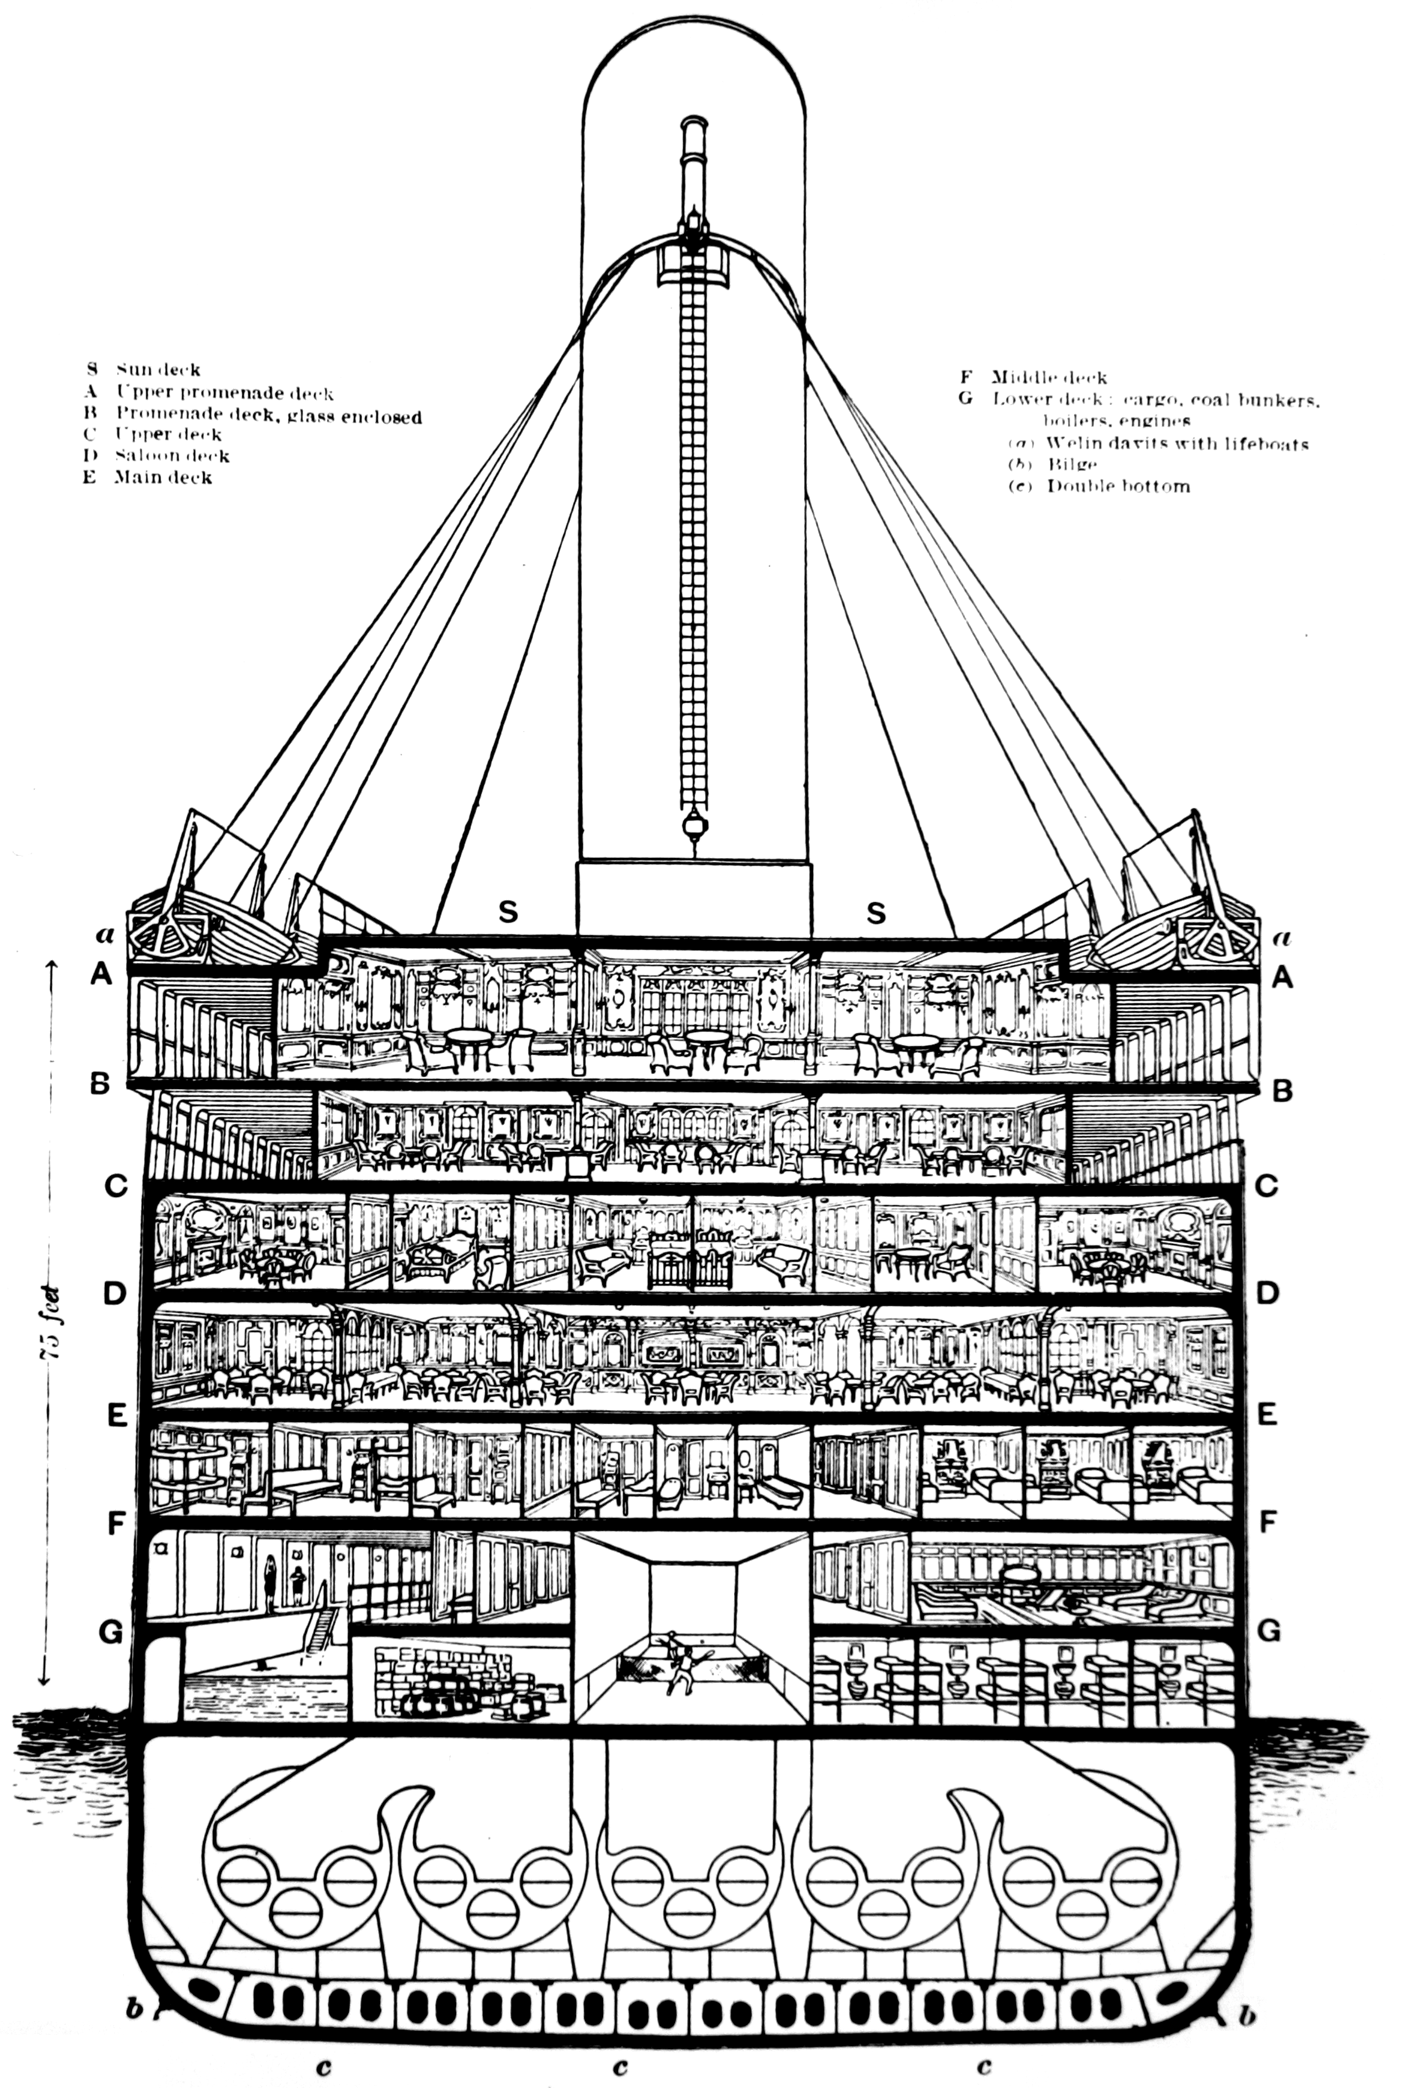

### Voy e eliminar las columnas que no necesito.
Para esto, primero creo una copia del dataframe original para no manipular los datos reales. Luego elimino las columnas que no son de utilidad para el análisis, como lo son las columnas `Ticket`, `PassengerId` y `Cabin` (que tiene mas del 80% de los valores nulos).

In [9]:
df = df_main.copy()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Sr. (Mr.): Puede indicar un hombre adulto.

Sra. (Mrs.): Una mujer casada.

Miss: Una mujer joven.

Master: Un niño.


In [50]:
df = df.drop(['Ticket', 'Cabin'], axis = 1)
df = pd.get_dummies(df, columns=['Sex', 'Pclass', 'Embarked'])

In [51]:
df.loc[:, 'FamilySize'] = df.SibSp + df.Parch + 1 # Pongo uno para agregar al pasajero.
df.sample(3)

,PassengerId,Survived,Name,Age,SibSp,Parch,Fare,Surname,FamilySize,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
783,784,0,"Johnston, Mr. Andrew G",NaN,1,2,23.4500,Johnston,4,False,True,False,False,True,False,False,True
860,861,0,"Hansen, Mr. Claus Peter",41.0,2,0,14.1083,Hansen,3,False,True,False,False,True,False,False,True
29,30,0,"Todoroff, Mr. Lalio",NaN,0,0,7.8958,Todoroff,1,False,True,False,False,True,False,False,True


In [52]:
medianAge_Mr = df.loc[df.Name.str.contains('Mr.')].Age.median()
medianAge_Mrs = df.loc[df.Name.str.contains('Mrs.')].Age.median()
medianAge_Miss = df.loc[df.Name.str.contains('Miss')].Age.median()
medianAge_Master = df.loc[df.Name.str.contains('Master')].Age.median()

print(medianAge_Mr,
medianAge_Mrs,
medianAge_Miss,
medianAge_Master
)

31.0 35.0 21.0 3.5


In [60]:
df.loc[:, 'Title'] = df.Name.str.extract(r' ([A-Za-z]+)\.')
df.sample(5)

,PassengerId,Survived,Name,Age,SibSp,Parch,Fare,Surname,FamilySize,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Title
59,60,0,"Goodwin, Master. William Frederick",11.0,5,2,46.9000,Goodwin,8,False,True,False,False,True,False,False,True,Master
509,510,1,"Lang, Mr. Fang",26.0,0,0,56.4958,Lang,1,False,True,False,False,True,False,False,True,Mr
661,662,0,"Badt, Mr. Mohamed",40.0,0,0,7.2250,Badt,1,False,True,False,False,True,True,False,False,Mr
118,119,0,"Baxter, Mr. Quigg Edmond",24.0,0,1,247.5208,Baxter,2,False,True,True,False,False,True,False,False,Mr
605,606,0,"Lindell, Mr. Edvard Bengtsson",36.0,1,0,15.5500,Lindell,2,False,True,False,False,True,False,False,True,Mr


In [73]:
test = df.copy()
test['Died'] = test.Survived.apply(lambda x: 1 if x == 0 else 0)

survidedByTitle = test[['Title','Survived', 'Died']].groupby('Title').sum().reset_index()

survidedByTitle['Total'] = survidedByTitle.Survived + survidedByTitle.Died

In [74]:
survidedByTitle

,Title,Survived,Died,Total
0,Capt,0,1,1
1,Col,1,1,2
2,Countess,1,0,1
3,Don,0,1,1
4,Dr,3,4,7
5,Jonkheer,0,1,1
6,Lady,1,0,1
7,Major,1,1,2
8,Master,23,17,40
9,Miss,127,55,182


In [104]:
df_num = df.drop(['Name', 'Surname'], axis = 1)
df_num.isna().sum()

PassengerId      0
Survived         0
Age            177
SibSp            0
Parch            0
Fare             0
FamilySize       0
Sex_female       0
Sex_male         0
Pclass_1         0
Pclass_2         0
Pclass_3         0
Embarked_C       0
Embarked_Q       0
Embarked_S       0
Title            0
dtype: int64

In [105]:
# A los registros que tienen nulos en la columna Age, le asigno el valor de Age_wiki

df_num = df_num.merge(df_ext[['PassengerId', 'Age_wiki']], how = 'outer', on = 'PassengerId')
df_num.Age = df_num.Age.fillna(df_num.Age_wiki)
df_num.isna().sum()

PassengerId    0
Survived       0
Age            4
SibSp          0
Parch          0
Fare           0
FamilySize     0
Sex_female     0
Sex_male       0
Pclass_1       0
Pclass_2       0
Pclass_3       0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
Title          0
Age_wiki       4
dtype: int64

In [106]:
df_num.loc[df_num.Age.isna()]

,PassengerId,Survived,Age,SibSp,Parch,Fare,FamilySize,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Title,Age_wiki
42,43,0,NaN,0,0,7.8958,1,False,True,False,False,True,True,False,False,Mr,NaN
347,348,1,NaN,1,0,16.1000,2,True,False,False,False,True,False,False,True,Mrs,NaN
420,421,0,NaN,0,0,7.8958,1,False,True,False,False,True,True,False,False,Mr,NaN
557,558,0,NaN,0,0,227.5250,1,False,True,True,False,False,True,False,False,Mr,NaN


In [107]:
df_num = pd.get_dummies(df_num, ['Title'])

In [108]:
df_num = df_num.drop('Age_wiki', axis = 1)
age_to_drop = df_num.loc[df_num.Age.isna()].index
df_num = df_num.drop(age_to_drop, axis = 0).astype(float)

df_num.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,FamilySize,Sex_female,Sex_male,Pclass_1,...,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir
0,1.0,0.0,22.0,1.0,0.0,7.2500,2.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2.0,1.0,38.0,1.0,0.0,71.2833,2.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,3.0,1.0,26.0,0.0,0.0,7.9250,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,1.0,35.0,1.0,0.0,53.1000,2.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,5.0,0.0,35.0,0.0,0.0,8.0500,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [109]:
df_num.to_csv('../datasets/titanic-limpio-numerico-2.csv', index = False)

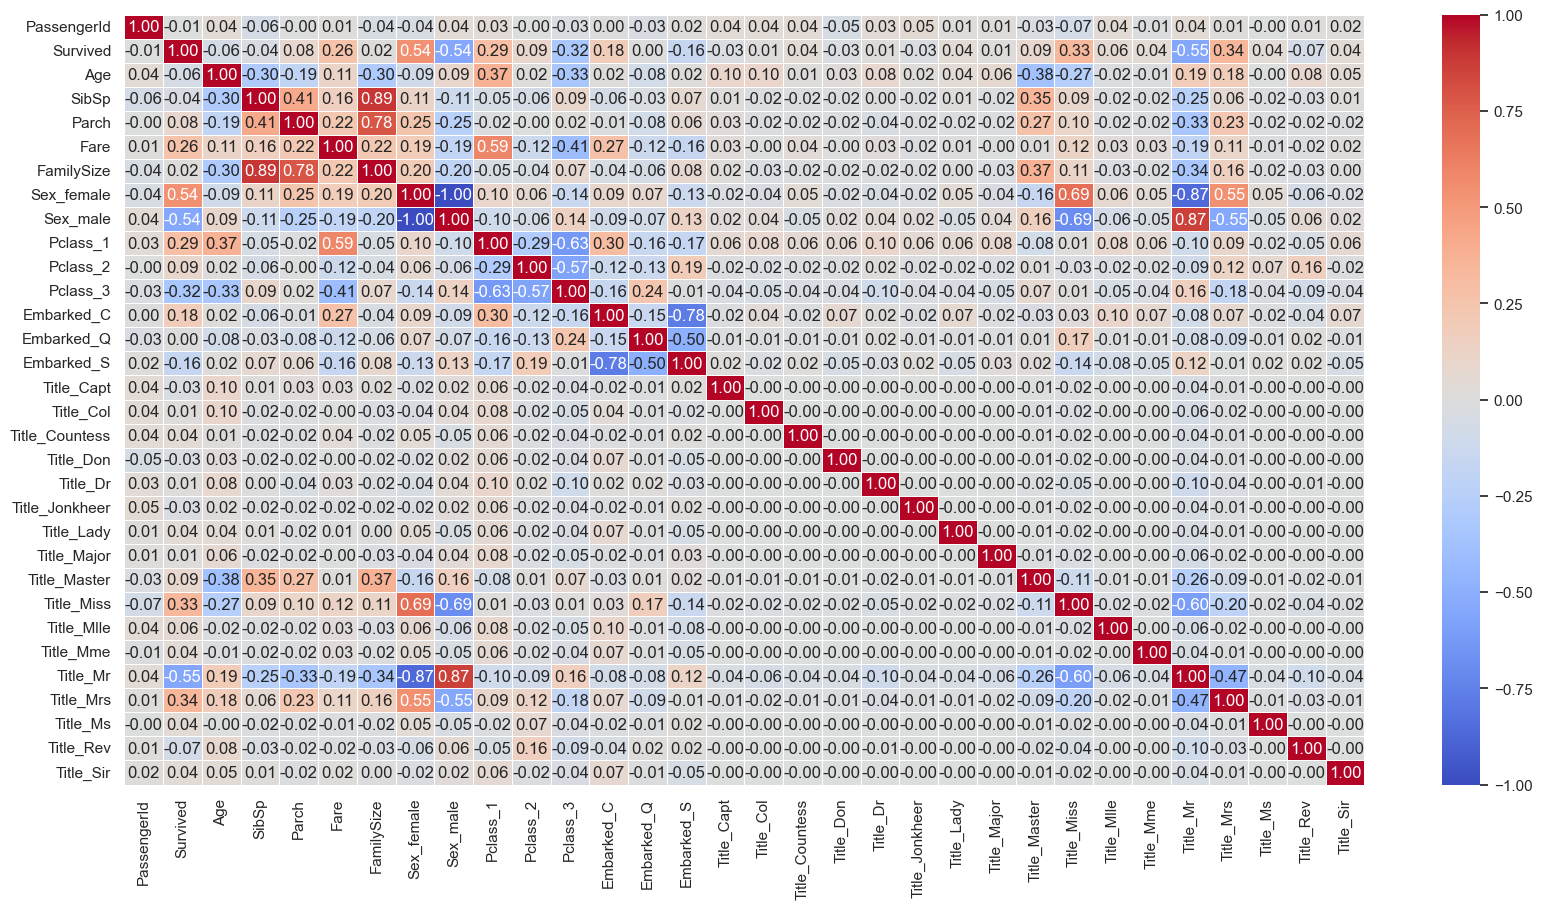

In [111]:
correlacion = df_num[df_num.describe().columns].corr()

plt.figure(figsize=(20, 10))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

## Crear modelos de machine learning.

In [ ]:
x, y = df_num.drop('Survived', axis = 1), df_num.Survived

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 123)
x_val_train, x_val_test, y_val_train, y_val_test = train_test_split(x_train, y_train, test_size = 0.25, random_state = 123)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
print(x_val_train.shape, x_val_test.shape, y_val_train.shape, y_val_test.shape)

(665, 13) (222, 13) (665,) (222,)
(498, 13) (167, 13) (498,) (167,)


### Arbol de decisión

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
y_pred = DecisionTreeClassifier(max_depth=30).fit(x_train, y_train).predict(x_test)
acc = accuracy_score(y_test, y_pred)
print('Accuracy:', acc)

Accuracy: 0.7432432432432432


In [ ]:
confusion_matrix(y_test, y_pred)

array([[102,  36],
       [ 21,  63]])

### Random Forest

In [ ]:
list(range(10, 20))

TypeError: can only concatenate list (not "NoneType") to list

In [ ]:
from sklearn.ensemble import RandomForestClassifier

depth = list(range(10, 80, 10))
depth.append(None)

param_grid = {
    'n_estimators': list(range(10, 400, 50)),
    'max_depth': depth,
    'min_samples_split': list(range(2, 25, 5))
}

grid = GridSearchCV(estimator = RandomForestClassifier(),
                    param_grid=param_grid,
                    scoring='accuracy',
                    cv=2,
                    verbose=1,
                    n_jobs=-1).fit(x_val_train, y_val_train)

print(grid.best_params_)

Fitting 2 folds for each of 320 candidates, totalling 640 fits
{'max_depth': 10, 'min_samples_split': 12, 'n_estimators': 10}


In [ ]:
y_pred = RandomForestClassifier(**grid.best_params_).fit(x_val_train, y_val_train).predict(x_val_test)
acc = accuracy_score(y_val_test, y_pred)
print('Accuracy:', acc)

Accuracy: 0.7844311377245509


## Scraping

In [ ]:
import requests

cookies = {
    'cf_clearance': 'm68TaibsdD9fgdfWBTEufWXPLLPBv45VqFx5BPDvAKI-1727630539-1.2.1.1-Fx.FuIbHwqECY5c.T.FpwWCu7vlgyY.ByXzN2qmoW8uFy8pjME.CQW8IPD6a0UCPtvYhQYyZmfbJT4sVRdz1tDxO97LJXjATOwUc5yt_lbJarEZZcz142RevuJ0w0g35cvhWUpXUijYDWFn64uBS3MPn0C3nAYbpvAka6Deal3Ega2NN_WgvlPW4dhQmQkhKbVeufM6CIDCDrS6gKW_Swh6LrbGQ5xiZlQvwVBNcoBKFw27w4Au178YH00D29NebVVTU755Vj00pt6s0VamoiEL3O013d0Pt3ct0rtC8N85LDtUlY5FFtyNARlZq_nQzYy_Os8yT6bUnx7SYM22PzJqgKKbLhL.IijeMKfp2bwiEjoBSJ0Zx30C..ZOT90y7vrxhZSrB88z1cPAMgmaTqw',
}

headers = {
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8',
    'accept-language': 'es-419,es;q=0.8',
    'cache-control': 'max-age=0',
    # 'cookie': 'cf_clearance=m68TaibsdD9fgdfWBTEufWXPLLPBv45VqFx5BPDvAKI-1727630539-1.2.1.1-Fx.FuIbHwqECY5c.T.FpwWCu7vlgyY.ByXzN2qmoW8uFy8pjME.CQW8IPD6a0UCPtvYhQYyZmfbJT4sVRdz1tDxO97LJXjATOwUc5yt_lbJarEZZcz142RevuJ0w0g35cvhWUpXUijYDWFn64uBS3MPn0C3nAYbpvAka6Deal3Ega2NN_WgvlPW4dhQmQkhKbVeufM6CIDCDrS6gKW_Swh6LrbGQ5xiZlQvwVBNcoBKFw27w4Au178YH00D29NebVVTU755Vj00pt6s0VamoiEL3O013d0Pt3ct0rtC8N85LDtUlY5FFtyNARlZq_nQzYy_Os8yT6bUnx7SYM22PzJqgKKbLhL.IijeMKfp2bwiEjoBSJ0Zx30C..ZOT90y7vrxhZSrB88z1cPAMgmaTqw',
    'priority': 'u=0, i',
    'referer': 'https://www.google.com/',
    'sec-ch-ua': '"Brave";v="129", "Not=A?Brand";v="8", "Chromium";v="129"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Windows"',
    'sec-fetch-dest': 'document',
    'sec-fetch-mode': 'navigate',
    'sec-fetch-site': 'cross-site',
    'sec-fetch-user': '?1',
    'sec-gpc': '1',
    'upgrade-insecure-requests': '1',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/129.0.0.0 Safari/537.36',
}

response = requests.get('https://www.encyclopedia-titanica.org/cabins.html', cookies=cookies, headers=headers)

In [ ]:
with open('cabin-allocations-titanic.html', 'w', encoding='utf-8') as file:
    file.write(response.text)

In [ ]:
cabins = pd.read_html('/content/cabin-allocations-titanic.html')[0]

In [ ]:
cabins.head(7)

,Cabin No.,Name,Evidence,Comments
0,Boat Deck,NaN,NaN,"6 cabins, accommodation for 7 people."
1,"""T""","Blackwell, Mr Stephen Weart",Cave List,There is no evidence that anyone else occupied...
2,NaN,NaN,NaN,NaN
3,A Deck,NaN,NaN,"36 cabins, accommodation for 48 people."
4,A-5,"Goldschmidt, Mr George B.",Cave List,NaN
5,A-6 or A-8 (?),"Beattie, Mr Thomson McCaffry, Mr Thomas Francis",Peuchen's testimony at the Senate inquiry,When Peuchen is asked about where his friends ...
6,A-7,"Smith, Mr James Clinch",Cave List,NaN


In [ ]:
cabins = cabins.dropna(subset = ['Cabin No.']).reset_index(drop = True)

In [ ]:
import json

sections = cabins.loc[cabins['Cabin No.'].str.contains('Deck')]['Cabin No.']
dic = json.loads(sections.to_json())
formatted_dic = {int(k): v for k, v in dic.items()}
formatted_dic

{0: 'Boat Deck',
 2: 'A Deck',
 24: 'B Deck',
 70: 'C Deck',
 136: 'D Deck',
 169: 'E Deck',
 171: 'E Deck (?E-10)',
 201: 'D Deck',
 203: 'E Deck',
 206: 'F Deck',
 211: 'Unknown Deck',
 213: 'D Deck',
 215: 'E Deck',
 220: 'F Deck',
 226: 'G Deck'}

In [ ]:
dataframes = []
for i, (k, v) in enumerate(formatted_dic.items()):
  try:
    start = k + 1
    limit = list(formatted_dic.keys())[i + 1]
    df = cabins[start: limit - 1]
    df['deck'] = v
    dataframes.append(df)
  except:
    start = k + 1
    limit = list(formatted_dic.keys())[i]
    df = cabins[start: limit - 1]
    df['deck'] = v
    dataframes.append(df)

<ipython-input-142-37c43396f319>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['deck'] = v
<ipython-input-142-37c43396f319>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['deck'] = v
<ipython-input-142-37c43396f319>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

In [ ]:
dataframes[13]

,Cabin No.,Name,Evidence,Comments,deck
221,38 (?),"Tobin, Mr Roger",Unknown,In section C,F Deck
222,46 (?),"Mardirosian, Mr Sarkis (+ three other steerage)",Unknown,In section E,F Deck
223,57 (?),"Krekorian, Mr Neshan",Unknown,In section E,F Deck
224,63 (?),"Abelseth, Mr Olaus Jørgensen Humblen, Mr Adolf...",Unknown,In section G,F Deck


In [ ]:
def clean_section(x):
    if pd.isna(x):
      return None

    cabin = x.strip('Deck')
    clean = re.sub(r'[^A-G]', '', str(cabin))

    return clean[0] if len(clean)  > 1 else clean

In [ ]:
df_cabins = cabins.copy()

In [ ]:
df_cabins['Cabin No.'] = df_cabins['Cabin No.'].apply(clean_section)

In [ ]:
df_cabins.Comments = df_cabins.Comments.apply(clean_section)

## **Data en internet**

Cabinas por pasajero: https://www.encyclopedia-titanica.org/cabins.html

Pasajeros por clase: https://titanicfacts.net/titanic-passenger-list/